<a href="https://colab.research.google.com/github/codeforgirls-sa/ml/blob/master/Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Example



<h1> Contents </h1>








* Understand Data 
* Data Exploration
* What are the main characteristics which have the most impact
* Data Visualization 
* Strong and Weak Linear Relationship  
* Detect and Deal with Outliers
* Correlation
* Descriptive Statistical Analysis
* Conclusion (What are Important Variables)
* Model Development
* Save the Model





---

 





#Understand Data
 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://github.com/gdg-ml-team/DevFest19/blob/master/student-math.csv">https://github.com/gdg-ml-team/DevFest19/blob/master/student-math.csv</a>. 

</p>



###Import libraries




In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![alt text](https://github.com/Ruqyai/Files/blob/master/workflow.png?raw=true)

### Load the dataset

In [0]:
filename = "https://raw.githubusercontent.com/gdg-ml-team/DevFest19/master/student-math.csv"


###Read the dataset

In [0]:
df = pd.read_csv(filename)

##Data Exploration

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


<h3>Convert categorical values into numerical values</h3>

In [5]:
# We need to represents the categorical values as numerical values
columns  = df.columns
for coloumn in columns :
    if (str(df[coloumn].dtype).startswith("object")):
            values = df[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            print(coloumn,convertor)
            df[coloumn] = [convertor[item] for item in df[coloumn]]

school {'GP': 0, 'MS': 1}
sex {'F': 0, 'M': 1}
address {'U': 0, 'R': 1}
famsize {'GT3': 0, 'LE3': 1}
Pstatus {'A': 0, 'T': 1}
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian {'mother': 0, 'father': 1, 'other': 2}
schoolsup {'yes': 0, 'no': 1}
famsup {'no': 0, 'yes': 1}
paid {'no': 0, 'yes': 1}
activities {'no': 0, 'yes': 1}
nursery {'yes': 0, 'no': 1}
higher {'yes': 0, 'no': 1}
internet {'no': 0, 'yes': 1}
romantic {'no': 0, 'yes': 1}


In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,1,1,0,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,0,0,1,0,0,0,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,1,1,1,1,0,0,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,1,1,1,0,0,0,0,0,4,3,2,1,2,5,4,6,10,10


##What are the main characteristics which have the most impact ?
Use **Visualization** to answer

## Overall View

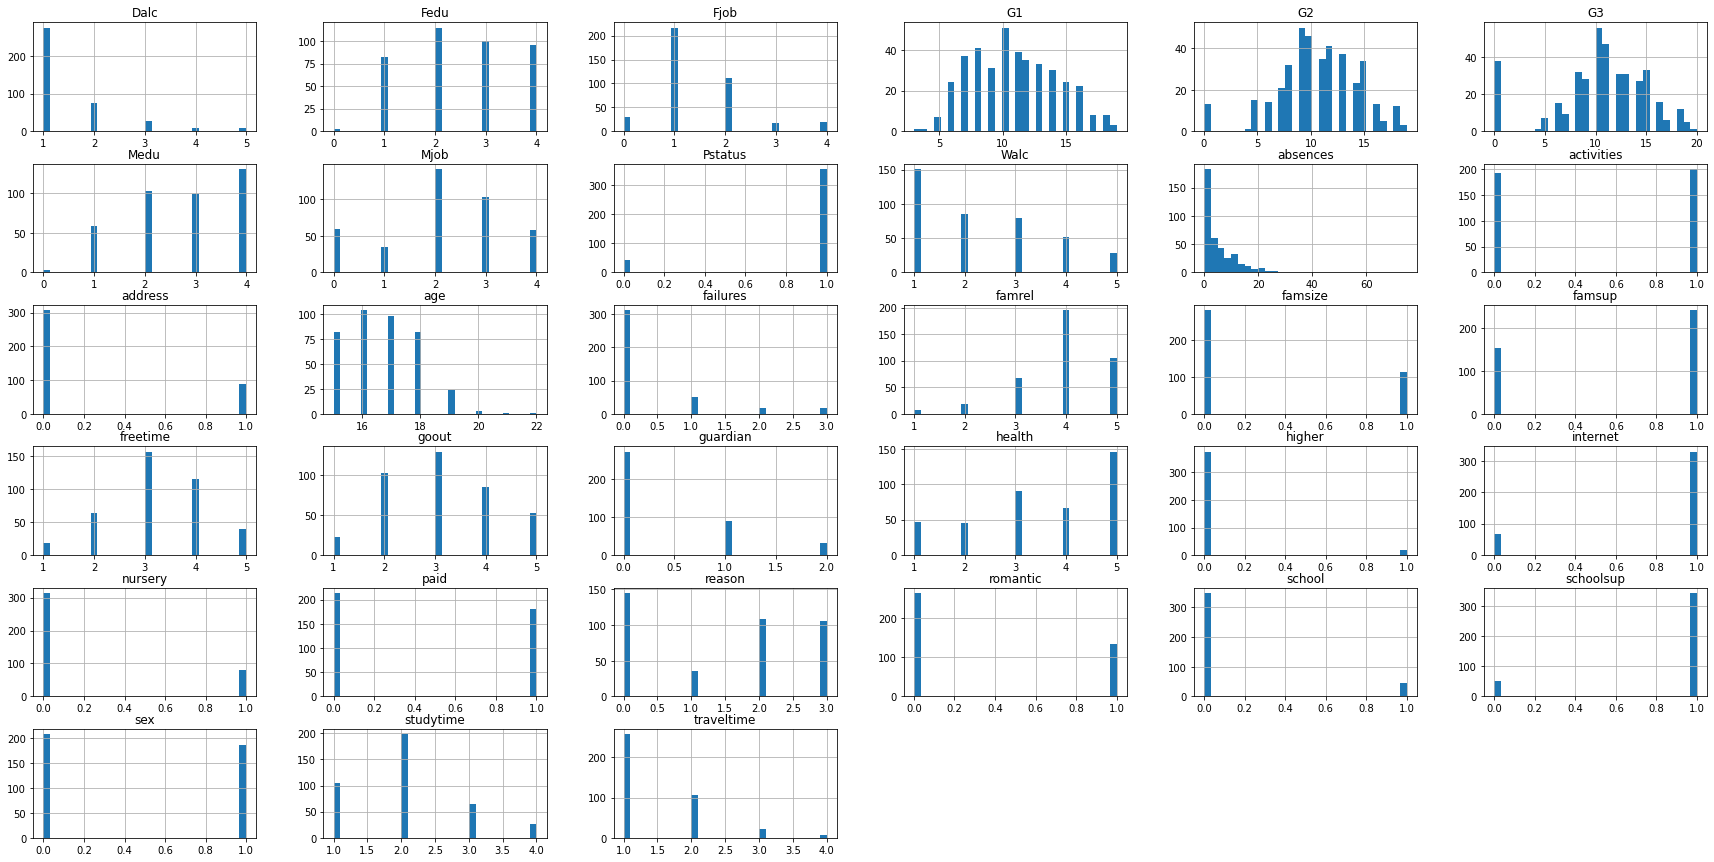

In [7]:
df.hist(bins=30,figsize=(30,15)) 
plt.show()

##Strong and Weak Linear Relationship
In order to start understanding the (linear) relationship between an individual variable and the G3. We can do this by using "**regplot**", which plots the scatterplot plus the fitted regression line for the data.

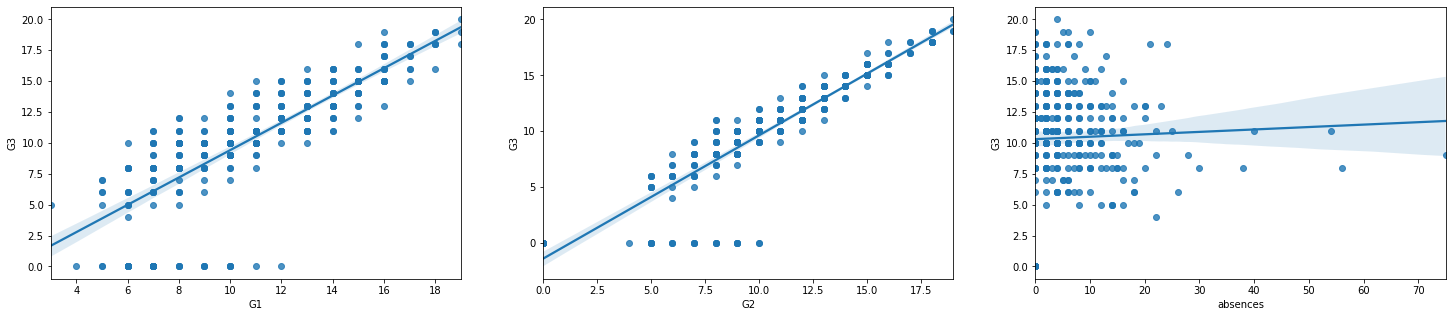

In [8]:
plt.figure(figsize=(25,5))
plt.subplot(131)
sb.regplot(x="G1", y="G3", data=df)
plt.subplot(132)
sb.regplot(x="G2", y="G3", data=df)
plt.subplot(133)
sb.regplot(x="absences", y="G3", data=df)



In [0]:
#remove outliers
df["G3"].replace(0, np.nan, inplace=True)
df.dropna(subset=["G3"], axis=0, inplace=True)

## Detect and Deal with Outliers
There are many ways to detect outliers. One of the simplest methods for detecting outliers is the use of box plots.

##Correlation
**Correlation:** a measure of the extent of interdependence between variables.

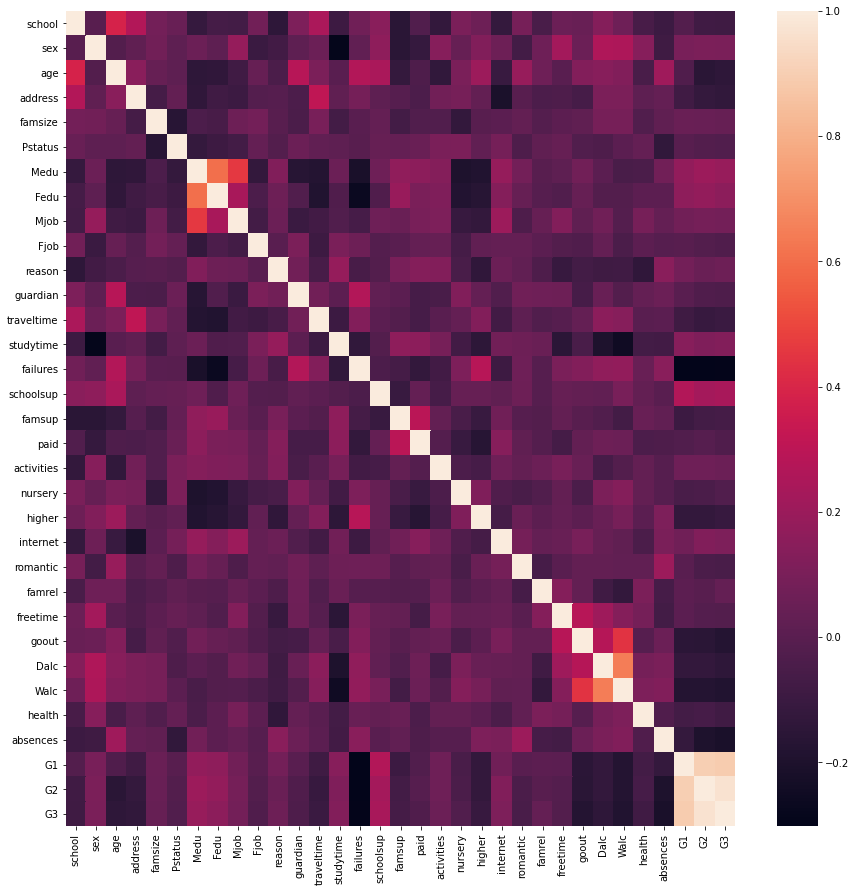

In [10]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr())



## Conclusion (What are Important Variables)
<h3>Select Features</h3>

In [11]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
# drop features that you don't need
df = df.drop(['school','address', 'reason', 'Pstatus', 'guardian', 'nursery'], axis =1)
df.head()

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,4,0,0,2,2,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6.0
1,0,17,0,1,1,0,1,1,2,0,1,1,0,0,0,1,0,5,3,3,1,1,3,4,5,5,6.0
2,0,15,1,1,1,0,1,1,2,3,0,0,1,0,0,1,0,4,3,2,2,3,3,10,7,8,10.0
3,0,15,0,4,2,1,2,1,3,0,1,1,1,1,0,1,1,3,2,2,1,1,5,2,15,14,15.0
4,0,16,0,3,3,2,1,1,2,0,1,1,1,0,0,0,0,4,3,2,1,2,5,4,6,10,10.0


In [0]:
labels = df['G3'].values
features = df.drop(['G3'],axis=1).values



##Start Model Development



1. **Spilt data**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(249, 26) (108, 26) (249,) (108,)



   2. **Bulid, Train and Evaluate the Model**


In [15]:
# Build The structure of Model
from sklearn import linear_model

model=linear_model.LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Evaluate
Accuracy = model.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = model.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)


Accuracy of the training :  94.17851684409328
Accuracy of the testing :  93.26920132760846


3. **Predict**

In [28]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) 
print ("Predicted final grade : ", predict[idx])
print ("Real final grade : ", y_test[idx])

Predicted final grade :  15.36300590067774
Real final grade :  15.0


4. **Visualize**

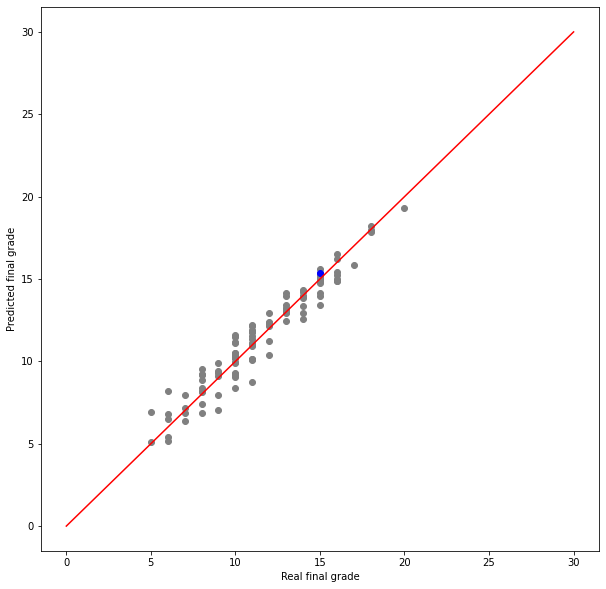

In [29]:
# visualization
plt.figure(figsize=(10,10))
plt.scatter(y_test, predict,  color='Grey')
plt.scatter(y_test[idx], predict[idx] , color='blue')
plt.xlabel('Real final grade')
plt.ylabel('Predicted final grade')
plt.plot([0, 30], [0, 30], color='red')

#Save, Load and Use the Model

In [18]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'saved_model.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['saved_model.pkl']

In [0]:
# Load the pickle file
model_load = joblib.load('saved_model.pkl') 

In [20]:
#check if it the same model by print the score for test set
result = model_load.score(X_test, y_test)
print(result)

0.9326920132760845


 **Remember**  


**input_columns**=['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

 **Remember**  
 
school {'GP': 0, 'MS': 1}  
sex {'F': 0, 'M': 1}  
address {'U': 0, 'R': 1}  
famsize {'GT3': 0, 'LE3': 1}  
Pstatus {'A': 0, 'T': 1}  
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}  
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}  
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}  
guardian {'mother': 0, 'father': 1, 'other': 2}  
schoolsup {'yes': 0, 'no': 1}  
famsup {'no': 0, 'yes': 1}  
paid {'no': 0, 'yes': 1}  
activities {'no': 0, 'yes': 1}  
nursery {'yes': 0, 'no': 1}  
higher {'yes': 0, 'no': 1}  
internet {'no': 0, 'yes': 1}  
romantic {'no': 0, 'yes': 1}  


In [21]:
#use the saved model for prediction
exmaple_input= [ 0 , 16 , 0 , 2 , 1 , 0 , 2  ,2 , 2,  1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 4 , 2 , 5 , 1 , 2 , 5 , 2 , 20,  20]
exmaple_predict= model_load.predict(np.array( [exmaple_input,]))
print("Predicted example input : ", exmaple_predict)


Predicted example input :  [19.759742]
